# Dự án phân tích số liệu các ca bệnh Covid-19 tại Việt Nam

## 1. Giới thiệu

Covid-19 hay là Corona Virus phát hiện lần đầu tiên tại Vũ Hán trung Quốc và được thông báo về trường hợp đầu tiên vào ngày 31/12/2019, và sau đó là hàng loạt các quốc gia đã có thông báo về các ca bệnh Covid 19 như Mỹ, Anh, Hàn Quốc... 
 Trong đó Việt Nam đã được báo cáo các ca mắc đầu tiên.

Đến tháng 5 năm 2020 Việt Nam đã ghi nhận 270 trường hợp lây nhiễm

Một điều đáng chú ý ở Việt Nam là luật về việc đi lại, di chuyển và tiếp xúc không khắt khe như ở Mỹ, Canada hay EU. Do đó, dữ liệu bệnh nhân COVID-19 tại Việt Nam được công bố rộng rãi. 
(Để minh bạch và hiệu quả hơn trong nhiệm vụ truy tìm liên lạc COVID-19, dữ liệu đưa ra phân tích bệnh nhân COVID-19 của Việt Nam được công bố công khai trên trang web của Bộ Y tế Việt Nam và trên báo chí.)

Tôi hi vọng phân tích này sẽ cung cấp cho bạn một số ý tưởng về phân tích dữ liệu về dịch bệnh nói chung và Covid 19 nói riêng

## 2. Nguồn dữ liệu

Dữ liệu được thu thập bằng cách thu thập dữ liệu web của Bộ Y tế Việt Nam (https://ncov.moh.gov.vn/) và các phương tiện truyền thông chính thống khác tại Việt Nam ( có dẫn kèm theo link)

## 3. Mục tiêu phân tích

#### 3.1 Mục tiêu phân tích dịch bệnh
1. Tỷ lệ mắc covid giữa Nam và Nữ
2. Độ tuổi trung bình mắc covid tại Việt Nam
3. Số người nước ngoài mắc covid tại Việt Nam
4. Tính riêng cho các công dân việt nam nhiễm COVID, tỉnh nào có nhiều ca mắc nhất, mô tả theo dòng thời gian của 3 tỉnh cao nhất: 
    - 4.1 Số ca nhiễm mỗi các tỉnh
    - 4.2 Số ca chuyển biến nặng là
    - 4.3 Số ca đỉnh điểm trong ngày
    - 4.4 Số ngày điều trị
5. Kết luận đưa ra đánh giá chung


#### 3.2 Các kỹ năng phân tích dữ liệu được sử dụng
1. Làm sạch dữ liệu
2. Tách dữ liệu ra các bảng để phân tích sâu
3. Chuyển đổi loại dữ liệu
4. Xử lý giá trị NULL
5. Trực quan hóa dữ liệu

#### 3.3 Các FameWorks và thư viện sử dụng
1. Numpy
2. Pandas
3. Matplotlib
4. Seaborn

In [61]:
# Thiết lập môi trường
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
import seaborn as sns
import warnings

In [63]:
from datetime import datetime

In [64]:
# Tải dữ liệu lên để phân tích
df = pd.read_csv("Vietnam_COVID-19_patient_data_May10_2020.csv")

In [5]:
df.head()

,ID,Gender,Age,Nationality,Detection Location,Treatment Location,Hospital,Confirmed Date,Travel History,Travel Country,...,Discharged Date,Re-Infected,Re-discharged,Reference 1,Reference 2,Reference 3,Reference 4,Reference 5,Note,Number of negative test before discharged
0,BN1,M,66.0,China,Ho Chi Minh City,Ho Chi Minh City,Bệnh viện Chợ Rẫy,1/23/20,1,Wuhan(China),...,2/12/20,NaN,NaN,https://vnexpress.net/dich-viem-phoi-corona/ha...,NaN,NaN,NaN,NaN,NaN,NaN
1,BN2,M,28.0,China,Ho Chi Minh City,Ho Chi Minh City,Bệnh viện Chợ Rẫy,1/23/20,0,NaN,...,2/4/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BN3,F,25.0,Vietnam,Thanh Hoa,Thanh Hoa,Bệnh viện đa khoa tỉnh Thanh Hóa,1/30/20,1,Wuhan(China),...,"(Feb 2020, no exact date)",NaN,NaN,https://vnexpress.net/dich-viem-phoi-corona/ba...,NaN,NaN,NaN,NaN,NaN,NaN
3,BN4,M,29.0,Vietnam,Vinh Phuc,Vinh Phuc,Bệnh viện Bệnh Nhiệt đới Trung Ương (cơ sở Đôn...,1/30/20,1,Wuhan(China),...,2/18/20,NaN,NaN,https://vnexpress.net/dich-viem-phoi-corona/ba...,https://vnexpress.net/suc-khoe/hai-benh-nhan-c...,https://bnews.vn/dich-do-virus-corona-them-2-b...,NaN,NaN,NaN,NaN
4,BN5,F,23.0,Vietnam,Vinh Phuc,Vinh Phuc,Bệnh viện Bệnh nhiệt đới Trung Ương (cơ sở 2),1/30/20,1,Wuhan(China),...,2/10/20,NaN,NaN,https://vnexpress.net/dich-viem-phoi-corona/ba...,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Tỷ lệ mắc covid nữa Nam và Nữ

In [65]:
df["Gender"].value_counts()
gender = [158,130]

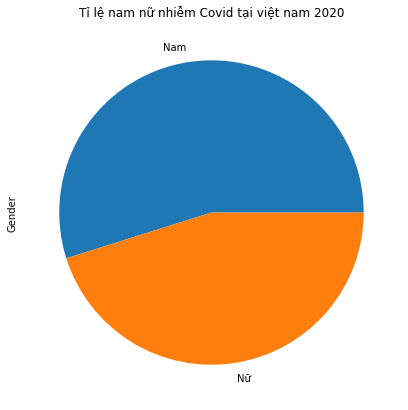

In [7]:
df['Gender'].value_counts().plot.pie(figsize = (10,7) ,title='Tỉ lệ nam nữ nhiễm Covid tại việt nam 2020',
                                     labels = {'Nam','Nữ'});

In [8]:
df.isnull().sum()

ID                                             0
Gender                                         0
Age                                            0
Nationality                                    0
Detection Location                             0
Treatment Location                             0
Hospital                                       0
Confirmed Date                                 0
Travel History                                 0
Travel Country                               104
Travel Country, Correct                      113
Source of Infection                          208
Relationship                                 186
Flight ID (Date)                             115
Infection Cluster                            154
Health Condition When Confirmed                0
Detail Symptoms When Confirmed (clean up)    202
Detail Symptoms When Confirmed                 0
Developing Symptoms                          275
Underlying Health Condition                  279
Discharged Date     

### 2. Độ tuổi trung bình mắc covid tại VN

In [9]:
df['Age'].dtype

dtype('float64')

In [10]:
df['Age'] = df['Age'].astype(int)

In [11]:
df['Age'].dtype

dtype('int32')

In [12]:
df.describe()

,Age,Travel History
count,288.000000,288.000000
mean,35.447917,0.638889
std,15.698956,0.481159
min,0.000000,0.000000
25%,23.000000,0.000000
50%,30.000000,1.000000
75%,47.000000,1.000000
max,88.000000,1.000000


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


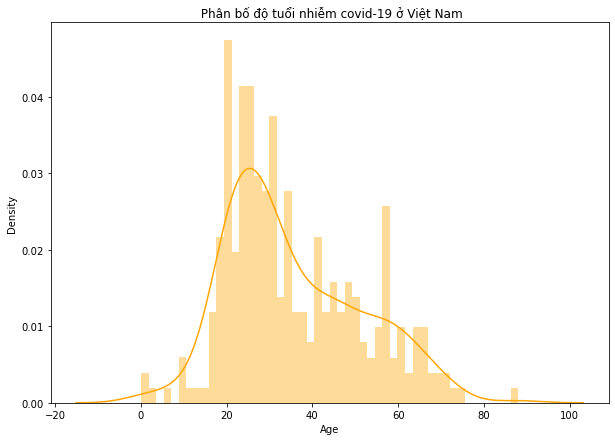

In [13]:
plt.figure( figsize = (10,7))
sns.distplot( df["Age"] ,color = 'orange', bins = 50);
plt.title(' Phân bố độ tuổi nhiễm covid-19 ở Việt Nam')
plt.show()

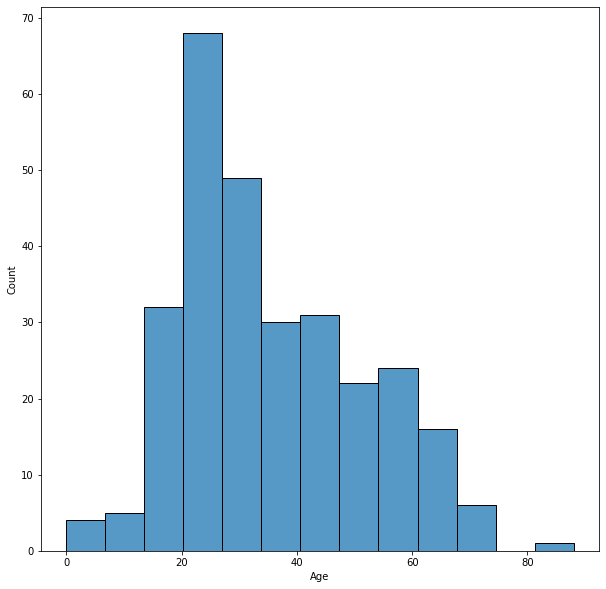

In [14]:
plt.figure( figsize = (10,10))
sns.histplot( df["Age"]);

### 3. Số người nước ngoài mắc covid tại Việt Nam

In [15]:
df["Nationality"].value_counts().head()

Vietnam           237
United Kingdom     21
Brazil              6
USA                 5
Germany             4
Name: Nationality, dtype: int64

In [16]:
nuocngoai =df.loc [df['Nationality'] != 'Vietnam']
trongnuoc =df.loc [df['Nationality'] == 'Vietnam']

In [17]:
df1 = [len(nuocngoai), len(trongnuoc)]
labels = ['Ngoài Nước','Trong Nước']

In [18]:
df1

[51, 237]

Text(0.5, 1.0, 'Tỉ lệ người việt nam và nước ngoài nhiễm covid tại VN')

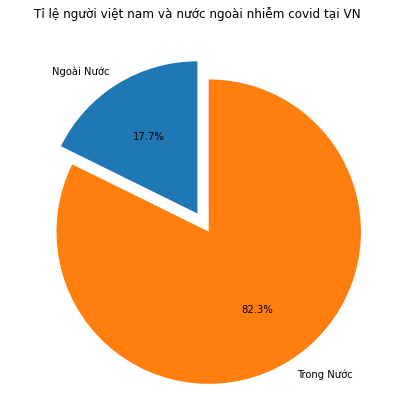

In [19]:
fig, ax = plt.subplots(figsize = (7,7))
ax.pie( df1, labels = labels, autopct='%1.1f%%',
        shadow=False,explode = (0, 0.14), startangle=90);
plt.title('Tỉ lệ người việt nam và nước ngoài nhiễm covid tại VN')

In [20]:
trongnuoc["Detection Location"].value_counts()

Hanoi               99
Ho Chi Minh City    32
Vinh Phuc           19
Can Tho             19
Ninh Binh           13
Binh Thuan           9
Dong Thap            4
Ha Tinh              4
Thanh Hoa            3
Tra Vinh             3
Bac Lieu             3
Tay Ninh             3
Da Nang              3
Ha Nam               3
Bac Giang            3
Hai Duong            2
Ninh Thuan           2
Lai Chau             2
Quang Ninh           2
Thai Binh            2
Hung Yen             1
Thai Nguyen          1
Ha Giang             1
Dong Nai             1
Ben Tre              1
Bac Ninh             1
Khanh Hoa            1
Name: Detection Location, dtype: int64

### 4 .Tính riêng cho các công dân việt nam nhiễm COVID

#### 4.1 Số ca nhiễm mỗi các tỉnh

In [21]:
bangthongketrongnuoc =pd.DataFrame(trongnuoc['Detection Location'].value_counts().sort_values(ascending=False))

In [22]:
bangthongketrongnuoc.rename(columns = {'Detection Location':'So Ca Nhiem'},inplace=True)

In [23]:
bangthongketrongnuoc.head(10)

,So Ca Nhiem
Hanoi,99
Ho Chi Minh City,32
Vinh Phuc,19
Can Tho,19
Ninh Binh,13
Binh Thuan,9
Dong Thap,4
Ha Tinh,4
Tay Ninh,3
Bac Giang,3


In [24]:
trongnuoc["Number of negative test before discharged"].unique()

array([nan, '5', '4', '9 times negative/positive'], dtype=object)

In [25]:
# tính số ca chuyển biến nặng
trongnuoc["Number of negative test before discharged"].value_counts().sum()

3

#### 4.2 Số ca chuyển biến nặng là:

In [26]:
selected_rows = trongnuoc[~trongnuoc['Number of negative test before discharged'].isnull()]
selected_rows

,ID,Gender,Age,Nationality,Detection Location,Treatment Location,Hospital,Confirmed Date,Travel History,Travel Country,...,Discharged Date,Re-Infected,Re-discharged,Reference 1,Reference 2,Reference 3,Reference 4,Reference 5,Note,Number of negative test before discharged
160,BN161,F,88,Vietnam,Hanoi,Hanoi,Bệnh viện Bệnh nhiệt đới Trung Ương (cơ sở 2),3/27/20,0,NaN,...,5/5/20,NaN,NaN,https://vnexpress.net/suc-khoe/so-ca-nhiem-nco...,https://vnexpress.net/cu-ba-88-tuoi-khoi-covid...,https://vnexpress.net/suc-khoe/sang-nay-khong-...,https://vnexpress.net/so-ca-nhiem-ncov-len-266...,NaN,NaN,5
250,BN251,M,64,Vietnam,Ha Nam,Ha Nam,Bệnh viện Đa khoa tỉnh Hà Nam,4/8/20,0,NaN,...,4/17/20,NaN,NaN,https://vnexpress.net/so-ca-nhiem-ncov-len-251...,https://vnexpress.net/them-18-benh-nhan-ra-vie...,https://vnexpress.net/nguoi-da-khoi-benh-covid...,NaN,NaN,Death of underlying conditiion (05/04/2020),4
264,BN265,M,26,Vietnam,Ha Tinh,Ha Tinh,"Bệnh viện Cầu Treo, Hà Tĩnh",4/13/20,1,Thailand,...,NaN,NaN,NaN,https://vnexpress.net/so-ca-nhiem-ncov-len-265...,https://vnexpress.net/benh-nhan-265-an-han-vi-...,https://vnexpress.net/benh-nhan-ncov-9-lan-xet...,NaN,NaN,Positive after 14 days quarantined (coming bac...,9 times negative/positive


In [27]:
trongnuoc [['Confirmed Date']] = trongnuoc [['Confirmed Date']] .apply(pd.to_datetime);

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [28]:
canhiem = trongnuoc[['Confirmed Date']]

In [29]:
canhiem

,Confirmed Date
2,2020-01-30
3,2020-01-30
4,2020-01-30
5,2020-02-01
7,2020-02-03
...,...
283,2020-05-07
284,2020-05-07
285,2020-05-07
286,2020-05-07


In [30]:
canhiem["so ca"] = 1

<ipython-input-30-8e9145bb5eb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canhiem["so ca"] = 1


In [31]:
canhiem.shape

(237, 2)

In [32]:
canhiem.set_index("Confirmed Date", inplace=True)

In [33]:
canhiem

,so ca
Confirmed Date,
2020-01-30,1
2020-01-30,1
2020-01-30,1
2020-02-01,1
2020-02-03,1
...,...
2020-05-07,1
2020-05-07,1
2020-05-07,1


In [34]:
sapxepcanhiem=canhiem.groupby(['Confirmed Date']).size().to_frame('so ca').reset_index()

In [35]:
sapxepcanhiem.head()

,Confirmed Date,so ca
0,2020-01-30,3
1,2020-02-01,1
2,2020-02-03,1
3,2020-02-04,2
4,2020-02-06,2


In [36]:
sapxepcanhiem1=sapxepcanhiem.sort_values(by='Confirmed Date', ascending=True)

#### 4.3 Số ca đỉnh điểm trong ngày 

In [37]:
sapxepcanhiem1.head()

,Confirmed Date,so ca
0,2020-01-30,3
1,2020-02-01,1
2,2020-02-03,1
3,2020-02-04,2
4,2020-02-06,2


In [38]:
print(canhiem.index.max())
print(canhiem.index.min())

2020-05-07 00:00:00
2020-01-30 00:00:00


plt.figure(figsize=[15,5])
sns.lineplot(x = btc_grouped.index , y = 'Close', data = btc_grouped)
plt.show()

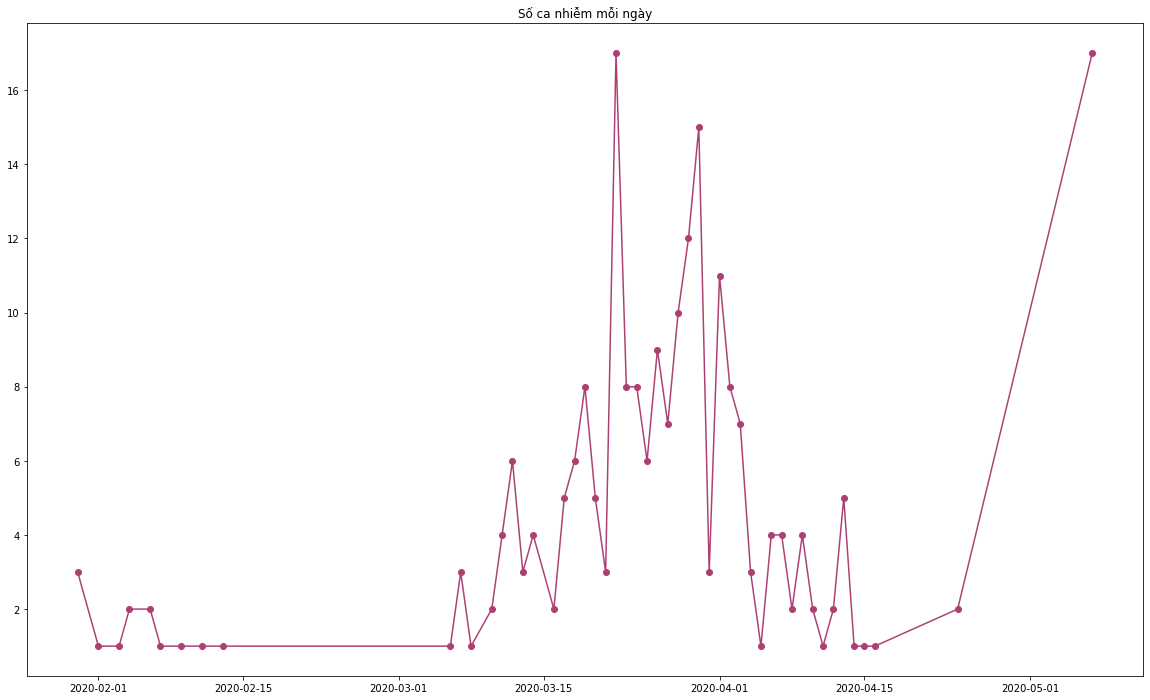

In [39]:
plt.figure(figsize=(20,12))
plt.plot(sapxepcanhiem1['Confirmed Date'],sapxepcanhiem1['so ca'],color="#ad4073",marker="o")
plt.title('Số ca nhiễm mỗi ngày');

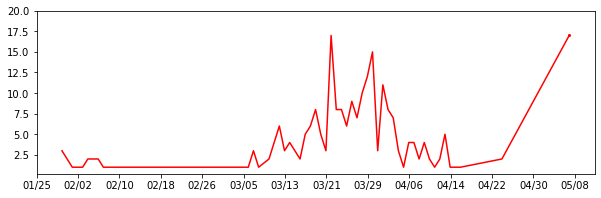

In [40]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize  = (10,3))
ax.plot(sapxepcanhiem1['Confirmed Date'],sapxepcanhiem1['so ca'] ,marker="o", markersize = 2, color = 'red', markevery=[-1])
ax.set_ylim(top = 20)
myFmt = DateFormatter('%m/%d')


#axis
ax.xaxis.set_major_formatter(myFmt)
start, end = ax.get_xlim()
ax.set_xlim(left = start)
ax.set_ylim(top = 20)
x_value = np.arange(start, end, 8)
ax.xaxis.set_ticks(x_value);


In [41]:
canhiem2 = trongnuoc[['ID','Age','Confirmed Date', 'Discharged Date']]

In [42]:
canhiem2

,ID,Age,Confirmed Date,Discharged Date
2,BN3,25,2020-01-30,"(Feb 2020, no exact date)"
3,BN4,29,2020-01-30,2/18/20
4,BN5,23,2020-01-30,2/10/20
5,BN6,25,2020-02-01,"(Feb 2020, no exact date)"
7,BN8,29,2020-02-03,2/10/20
...,...,...,...,...
283,BN284,30,2020-05-07,NaN
284,BN285,30,2020-05-07,NaN
285,BN286,23,2020-05-07,NaN
286,BN287,28,2020-05-07,NaN


In [43]:
canhiem2["Discharged Date"].fillna(canhiem2["Confirmed Date"], inplace=True)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [44]:
canhiem2

,ID,Age,Confirmed Date,Discharged Date
2,BN3,25,2020-01-30,"(Feb 2020, no exact date)"
3,BN4,29,2020-01-30,2/18/20
4,BN5,23,2020-01-30,2/10/20
5,BN6,25,2020-02-01,"(Feb 2020, no exact date)"
7,BN8,29,2020-02-03,2/10/20
...,...,...,...,...
283,BN284,30,2020-05-07,2020-05-07 00:00:00
284,BN285,30,2020-05-07,2020-05-07 00:00:00
285,BN286,23,2020-05-07,2020-05-07 00:00:00
286,BN287,28,2020-05-07,2020-05-07 00:00:00


In [45]:
canhiem2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 2 to 287
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               237 non-null    object        
 1   Age              237 non-null    int32         
 2   Confirmed Date   237 non-null    datetime64[ns]
 3   Discharged Date  237 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 8.3+ KB


In [46]:
canhiem2['Discharged Date'] =canhiem2['Discharged Date'].replace(to_replace = r'^\(', 
                                                                value = np.nan, regex = True)

<ipython-input-46-8254d9a8acec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canhiem2['Discharged Date'] =canhiem2['Discharged Date'].replace(to_replace = r'^\(',


In [47]:
canhiem2

,ID,Age,Confirmed Date,Discharged Date
2,BN3,25,2020-01-30,NaN
3,BN4,29,2020-01-30,2/18/20
4,BN5,23,2020-01-30,2/10/20
5,BN6,25,2020-02-01,NaN
7,BN8,29,2020-02-03,2/10/20
...,...,...,...,...
283,BN284,30,2020-05-07,2020-05-07 00:00:00
284,BN285,30,2020-05-07,2020-05-07 00:00:00
285,BN286,23,2020-05-07,2020-05-07 00:00:00
286,BN287,28,2020-05-07,2020-05-07 00:00:00


In [48]:
canhiem2["Discharged Date"].fillna(canhiem2["Confirmed Date"], inplace=True)
canhiem2 [['Discharged Date']] = canhiem2 [['Discharged Date']] .apply(pd.to_datetime)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [49]:
canhiem2 ['So ngay dieu tri']  = canhiem2['Discharged Date'] - canhiem2['Confirmed Date']

<ipython-input-49-0f9c2e784495>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canhiem2 ['So ngay dieu tri']  = canhiem2['Discharged Date'] - canhiem2['Confirmed Date']


In [50]:
canhiem2

,ID,Age,Confirmed Date,Discharged Date,So ngay dieu tri
2,BN3,25,2020-01-30,2020-01-30,0 days
3,BN4,29,2020-01-30,2020-02-18,19 days
4,BN5,23,2020-01-30,2020-02-10,11 days
5,BN6,25,2020-02-01,2020-02-01,0 days
7,BN8,29,2020-02-03,2020-02-10,7 days
...,...,...,...,...,...
283,BN284,30,2020-05-07,2020-05-07,0 days
284,BN285,30,2020-05-07,2020-05-07,0 days
285,BN286,23,2020-05-07,2020-05-07,0 days
286,BN287,28,2020-05-07,2020-05-07,0 days


In [51]:
songaydieutri =canhiem2.loc [canhiem2['So ngay dieu tri'] != '0 days']
khongco = canhiem2.loc [canhiem2['So ngay dieu tri'] == '0 days']

In [52]:
len(songaydieutri)

166

Text(0.5, 1.0, 'Tỷ lệ người báo cáo số ngày điều trị')

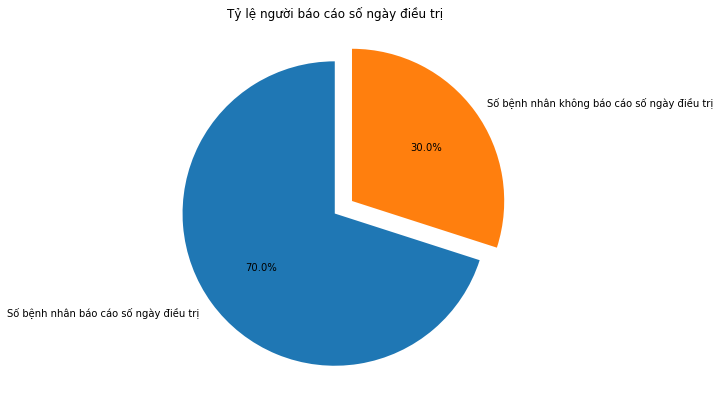

In [53]:
df2 = [len(songaydieutri), len(khongco)]
labels = ['Số bệnh nhân báo cáo số ngày điều trị','Số bệnh nhân không báo cáo số ngày điều trị']
fig, ax = plt.subplots(figsize = (7,7))
ax.pie( df2, labels = labels, autopct='%1.1f%%',
        shadow=False,explode = (0, 0.14), startangle=90);
plt.title('Tỷ lệ người báo cáo số ngày điều trị')

#### 4.4 Số ngày điều trị

In [54]:
songaydieutri

,ID,Age,Confirmed Date,Discharged Date,So ngay dieu tri
3,BN4,29,2020-01-30,2020-02-18,19 days
4,BN5,23,2020-01-30,2020-02-10,11 days
7,BN8,29,2020-02-03,2020-02-10,7 days
8,BN9,30,2020-02-04,2020-02-10,6 days
10,BN11,49,2020-02-06,2020-02-20,14 days
...,...,...,...,...,...
251,BN252,6,2020-04-09,2020-04-22,13 days
254,BN255,29,2020-04-09,2020-05-05,26 days
265,BN266,36,2020-04-14,2020-04-22,8 days
266,BN267,46,2020-04-15,2020-05-05,20 days


In [55]:
songaydieutri1 =songaydieutri.sort_values('Age')

In [56]:
songaydieutri1

,ID,Age,Confirmed Date,Discharged Date,So ngay dieu tri
14,BN15,0,2020-02-11,2020-02-20,9 days
39,BN40,2,2020-03-12,2020-04-03,22 days
251,BN252,6,2020-04-09,2020-04-22,13 days
101,BN102,9,2020-03-22,2020-04-07,16 days
203,BN204,10,2020-03-31,2020-04-10,10 days
...,...,...,...,...,...
132,BN133,66,2020-03-24,2020-04-17,24 days
231,BN232,67,2020-04-03,2020-04-14,11 days
233,BN234,69,2020-04-03,2020-04-09,6 days
238,BN239,71,2020-04-04,2020-04-14,10 days


### 5. Kết Luận

Sau quá trình phân tích đã tổng hợp được số liệu sau đây về Covid 19 tại Việt Nam:
- Tỉ lệ mắc là nam cao hơn nữ
- Độ tuổi nhiễm là 25 tuổi
- Số ca nhiễm của người quốc tịch Việt Nam: 237 người
- Số ca nhiễm của người Anh : 21 người
- Số ca nhiễm của người Brazil : 6 người
- Số ca nhiễm của người Mỹ: 5 người
- Số ca nhiễm của người Germany: 4 người
- Các tỉnh có ca mắc nhiều nhất là: Hà Nội (99), Hồ Chí Minh (32), Vĩnh Phúc(19), Cần Thơ(19)
- Số ca chuyển biến nặng là: 3
Vậy số ca nhiễm covid đã dần tăng mọi người cần chú đeo khẩu trang, thực hiện các biện pháp 5K của bộ y tế để bảo vệ sức khỏe